In [1256]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [1257]:
original = pd.read_spss("survey_answers_translated.sav")

In [1258]:
print(original.columns.tolist())

['timestamp', 'bfi1', 'bfi2', 'bfi3', 'bfi4', 'bfi5', 'bfi6', 'bfi7', 'bfi8', 'bfi9', 'bfi10', 'bfi11', 'bfi12', 'bfi13', 'bfi14', 'bfi15', 'bfi16', 'bfi17', 'bfi18', 'bfi19', 'bfi20', 'bfi21', 'bfi22', 'bfi23', 'bfi24', 'bfi25', 'bfi26', 'bfi27', 'bfi28', 'bfi29', 'bfi30', 'bfi31', 'bfi32', 'bfi33', 'bfi34', 'bfi35', 'bfi36', 'bfi37', 'bfi38', 'bfi39', 'bfi40', 'bfi41', 'bfi42', 'bfi43', 'bfi44', 'cfq1', 'cfq2', 'cfq3', 'cfq4', 'cfq5', 'cfq6', 'cfq7', 'cfq8', 'cfq9', 'cfq10', 'cfq11', 'cfq12', 'cfq13', 'cfq14', 'cfq15', 'cfq16', 'cfq17', 'cfq18', 'cfq19', 'cfq20', 'cfq21', 'cfq22', 'cfq23', 'cfq24', 'cfq25', 'dass_a1', 'dass_a2', 'dass_a3', 'dass_a4', 'dass_a5', 'dass_a6', 'dass_a7', 'sfpq_l1', 'sfpq_l2', 'sfpq_l3', 'sfpq_l4', 'sfpq_l5', 'sfpq_l6', 'sfpq_l7', 'sfpq_w1', 'sfpq_w2', 'sfpq_w3', 'sfpq_w4', 'sfpq_w5', 'sfpq_w6', 'sfpq_w7', 'age', 'gender', 'work_status', 'level_education', 'BFI_E', 'BFI_A', 'BFI_C', 'BFI_N', 'BFI_O', 'CFQ_total', 'DASS_A', 'SFPQ_W', 'SFPQ_L']


In [1259]:
# Take a subset of columns
# We don't want individual items, or the B5.
# Just predicting anx. based on flow, CFQ and demographics.
anx_data = original.loc[
    :,
    ["age", "gender", "work_status", "level_education", "CFQ_total", "DASS_A", "SFPQ_W", "SFPQ_L"]
 ]

Visualizations

(array([114.,  61.,  40.,  21.,  16.,   7.,   5.,   6.,   0.,   3.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <BarContainer object of 10 artists>)

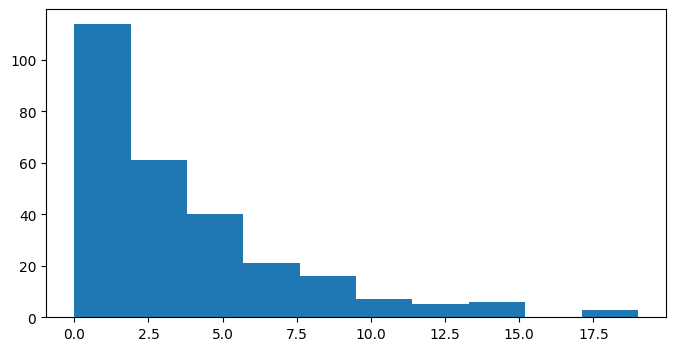

In [1260]:
plt.hist(anx_data.DASS_A)

In [1261]:
work_freq = anx_data.work_status.value_counts()

<BarContainer object of 2 artists>

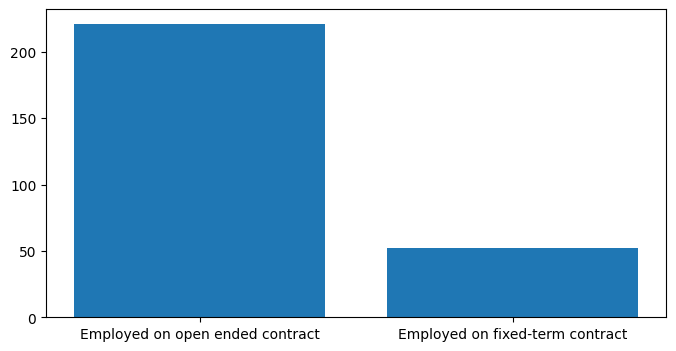

In [1262]:
plt.bar(
    work_freq.index,
    work_freq.values
    )

(array([ 3., 20., 44., 78., 58., 40., 21.,  6.,  2.,  1.]),
 array([ 1. ,  9.8, 18.6, 27.4, 36.2, 45. , 53.8, 62.6, 71.4, 80.2, 89. ]),
 <BarContainer object of 10 artists>)

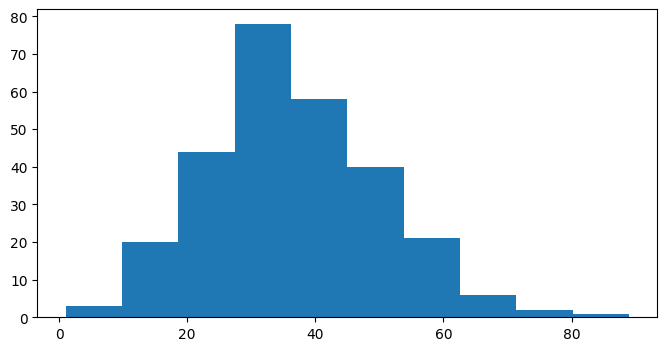

In [1263]:
plt.hist(anx_data.CFQ_total)

(array([ 1., 10., 13., 26., 29., 33., 78., 44., 24., 15.]),
 array([1.71428571, 2.04285714, 2.37142857, 2.7       , 3.02857143,
        3.35714286, 3.68571429, 4.01428571, 4.34285714, 4.67142857,
        5.        ]),
 <BarContainer object of 10 artists>)

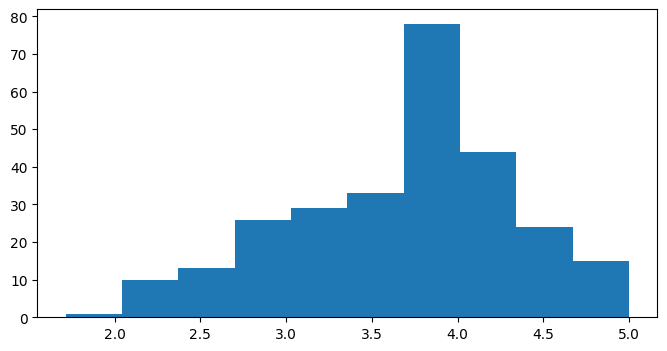

In [1264]:
plt.hist(anx_data.SFPQ_W)

(array([ 1.,  3., 13., 15., 18., 63., 69., 57., 22., 12.]),
 array([1.57142857, 1.91428571, 2.25714286, 2.6       , 2.94285714,
        3.28571429, 3.62857143, 3.97142857, 4.31428571, 4.65714286,
        5.        ]),
 <BarContainer object of 10 artists>)

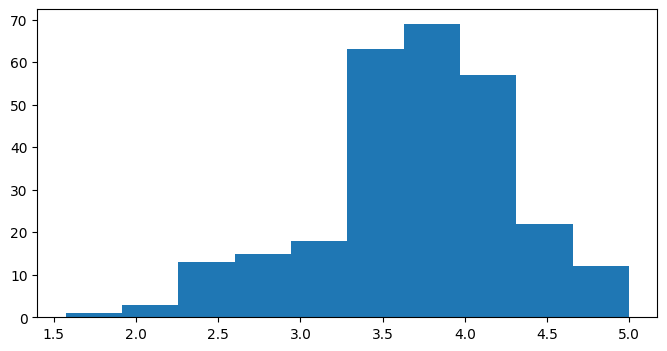

In [1265]:
plt.hist(anx_data.SFPQ_L)

Some correlations

In [1266]:
def scatter_polyfit_plot(x, y, poly_degree = 1, step = 0.1):
    """
    Plots a scatterplot with a line of fit for desired polynomial degree.
    Default degree, 1, plots a straight line of fit, equal to the linear model y ~ x.

    Args:
        x (Array): Data points to be plotted on the x-axis.
        y (Array): Data points to be plotted on the y-axis. Usually the target variable.
        poly_degree (int): Degree of polynomial to be fitted. Higher can lead to a more curved line, better fit but also potential overfit.
        step (float): Granularity of x values, for smoother plotting. Very small ranges of x (< 6) could benefit from lower step values.
            Lower values smooth the curve, more computationally expensive.
    Returns:
        None (a matplotlib graph will be plotted)
    """
    # Find polynomial coefficients
    coeffs = np.polyfit(x,
        y,
        poly_degree)
    
    # Plot observed data
    plt.scatter(
        x,
        y,
        alpha = 0.3
    )

    # The x - axis for the polynomial should not have repeated values
    # Otherwise lines would zig-zag back and forth
    x_range = np.arange(min(x), max(x) + step, step = step)

    # Array for each x_range value, add coeffs * x_power for each in list
    no_coeffs = len(coeffs)
    poly_y = np.zeros(len(x_range))

    for ix, coeff in enumerate(coeffs):
        currrent_power = no_coeffs - ix - 1
        y_step = coeff * pow(x_range, currrent_power)
        poly_y = poly_y + y_step


    plt.plot(x_range,
                poly_y)
    
    return(None)

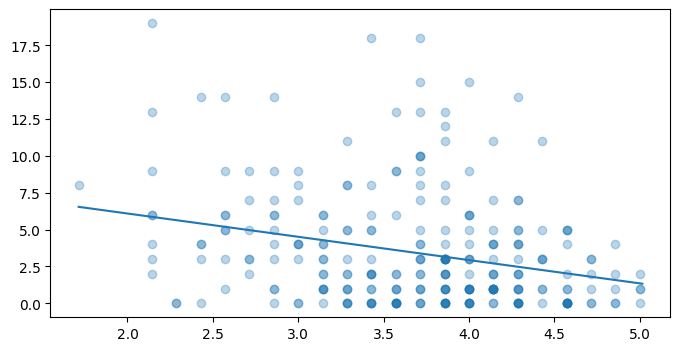

In [1267]:
scatter_polyfit_plot(
    anx_data["SFPQ_W"],
    anx_data["DASS_A"]
)


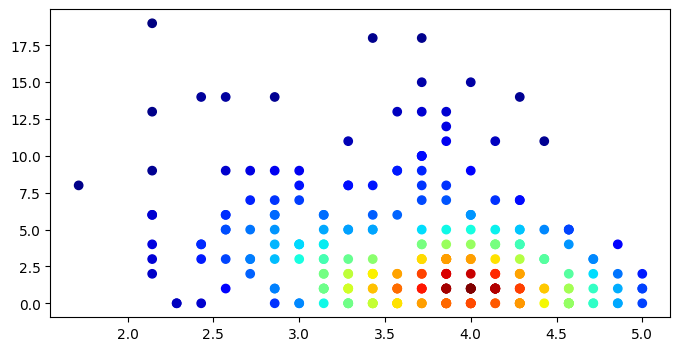

In [1268]:
# https://stackoverflow.com/questions/19064772/visualization-of-scatter-plots-with-overlapping-points-in-matplotlib
# Heat-map like

# Doesn't actually help that much - the primary problem of DASS data being closely grouped on the low end
from scipy.stats import gaussian_kde as kde
import numpy as np
from matplotlib.colors import Normalize
from matplotlib import cm

flow_anx = anx_data.loc[:, ["SFPQ_W", "DASS_A"]]

densObj = kde(flow_anx.to_numpy().T)

def makeColours( vals ):
    colours = np.zeros( (len(vals),3) )
    norm = Normalize( vmin=vals.min(), vmax=vals.max() )

    #Can put any colormap you like here.
    colours = [cm.ScalarMappable( norm=norm, cmap='jet').to_rgba( val ) for val in vals]

    return colours

colours = makeColours( densObj.evaluate( flow_anx.to_numpy().T ) )

plt.scatter(anx_data.SFPQ_W,
    anx_data.DASS_A,
     color=colours )
     
plt.show()

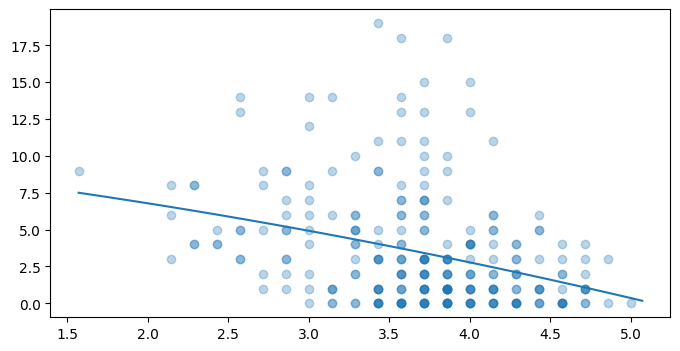

In [1269]:
scatter_polyfit_plot(
    anx_data.SFPQ_L,
    anx_data.DASS_A, 
    2
)


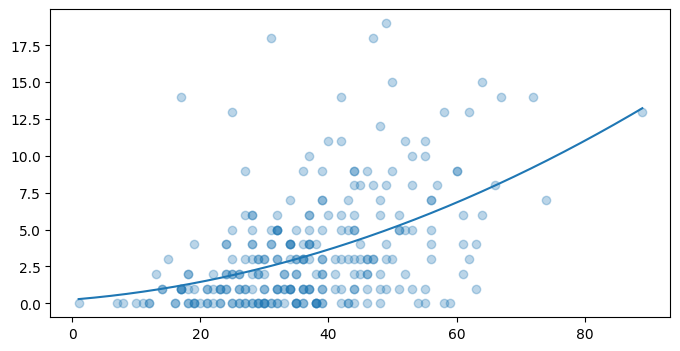

In [1270]:
# 2nd degree seems like a good fit!
scatter_polyfit_plot(
    anx_data.CFQ_total,
    anx_data.DASS_A, 
    2
)

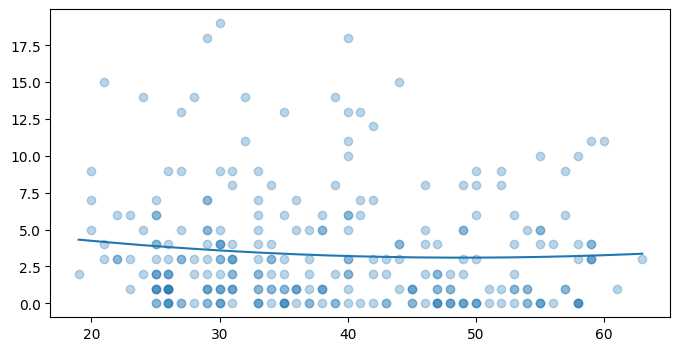

In [1271]:
# Get indices of missing data. Filter to non-missing by inverting via ~
missings = anx_data.age.isna()

scatter_polyfit_plot(
   anx_data.age[~missings],
   anx_data.DASS_A[~missings], 
   2
)

C:\Users\User\AppData\Local\Temp\ipykernel_95844\768697277.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = anx_data.groupby("gender")["DASS_A"].mean()


<BarContainer object of 2 artists>

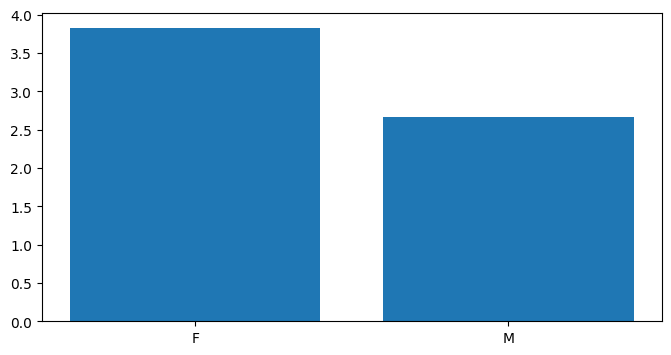

In [1272]:
plot_data = anx_data.groupby("gender")["DASS_A"].mean()
plt.bar(plot_data.keys(), plot_data.values)

C:\Users\User\AppData\Local\Temp\ipykernel_95844\768697277.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = anx_data.groupby("gender")["DASS_A"].mean()


<BarContainer object of 2 artists>

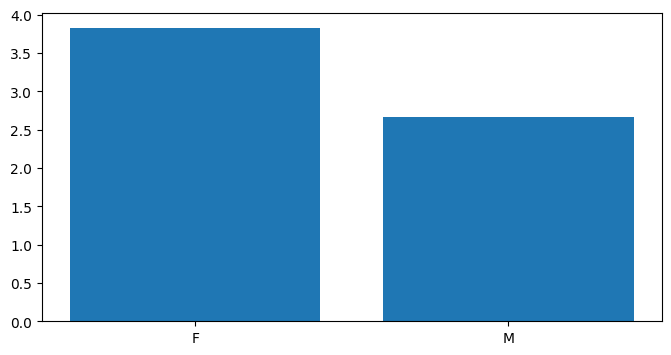

In [1273]:
plot_data = anx_data.groupby("gender")["DASS_A"].mean()
plt.bar(plot_data.keys(), plot_data.values)

C:\Users\User\AppData\Local\Temp\ipykernel_95844\1567843801.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = anx_data.groupby("work_status")["DASS_A"].mean()


<BarContainer object of 2 artists>

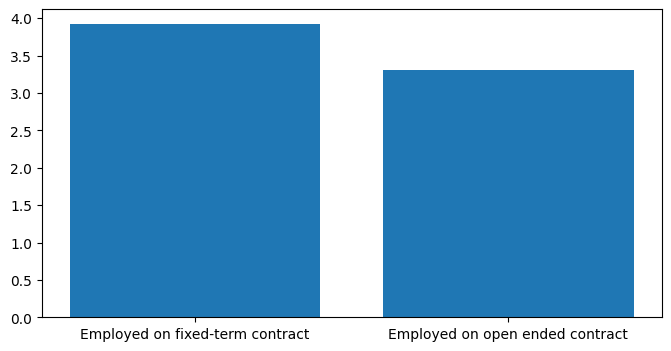

In [1274]:
plot_data = anx_data.groupby("work_status")["DASS_A"].mean()
plt.bar(plot_data.keys(), plot_data.values)

C:\Users\User\AppData\Local\Temp\ipykernel_95844\3434450627.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = anx_data.groupby("level_education")["DASS_A"].mean()


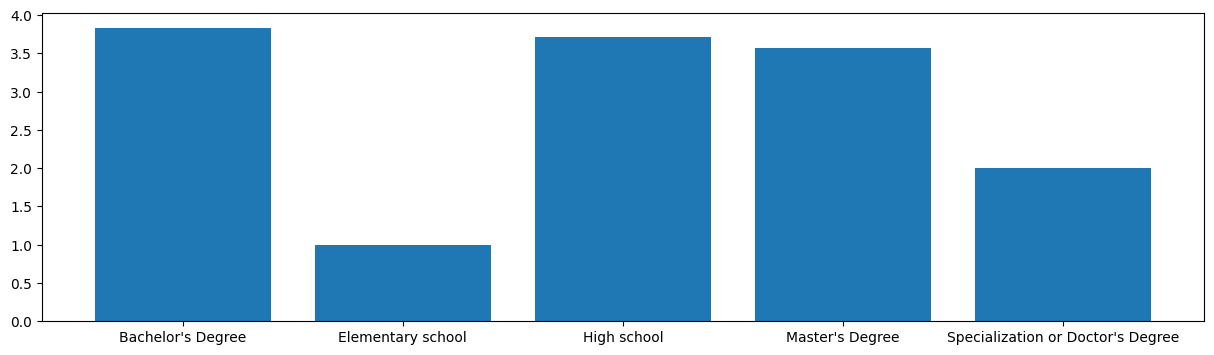

In [1275]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 4)

plot_data = anx_data.groupby("level_education")["DASS_A"].mean()
plt.bar(plot_data.keys(), plot_data.values)

# Restore size for new plots
plt.rcParams['figure.figsize'] = (8, 4)

Creating a log variable for DASS-A
also adding 0.001 so there are no issues taking the log of 0

In [1276]:
anx_data["DASS_A_log"] = np.log(anx_data["DASS_A"] + 1)

anx_data

,age,gender,work_status,level_education,CFQ_total,DASS_A,SFPQ_W,SFPQ_L,DASS_A_log
0,26.0,F,Employed on open ended contract,Master's Degree,36.0,4.0,2.857143,3.571429,1.609438
1,25.0,F,Employed on fixed-term contract,Master's Degree,27.0,6.0,2.571429,3.000000,1.945910
2,54.0,F,Employed on open ended contract,Master's Degree,44.0,5.0,3.285714,3.285714,1.791759
3,24.0,M,Employed on fixed-term contract,Bachelor's Degree,31.0,5.0,3.428571,2.571429,1.791759
4,22.0,M,Employed on fixed-term contract,Bachelor's Degree,48.0,6.0,2.571429,3.571429,1.945910
...,...,...,...,...,...,...,...,...,...
268,56.0,F,Employed on open ended contract,Master's Degree,37.0,4.0,3.000000,3.000000,1.609438
269,35.0,F,Employed on fixed-term contract,Master's Degree,32.0,6.0,2.142857,3.142857,1.945910
270,35.0,F,Employed on open ended contract,Bachelor's Degree,17.0,1.0,3.428571,4.142857,0.693147
271,33.0,F,Employed on open ended contract,Master's Degree,52.0,5.0,2.571429,2.714286,1.791759


(array([63.,  0., 51., 29., 32., 40., 21., 16., 12.,  9.]),
 array([0.        , 0.29957323, 0.59914645, 0.89871968, 1.19829291,
        1.49786614, 1.79743936, 2.09701259, 2.39658582, 2.69615905,
        2.99573227]),
 <BarContainer object of 10 artists>)

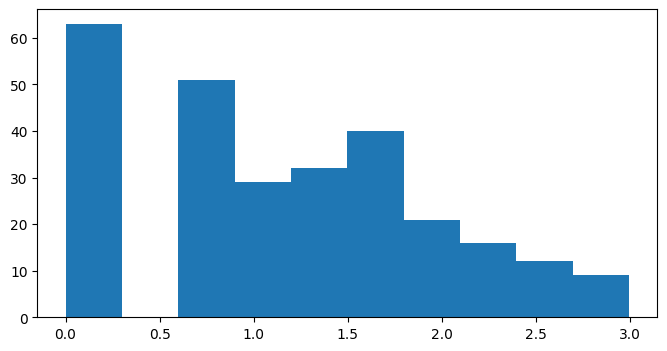

In [1277]:
plt.hist(anx_data.DASS_A_log)

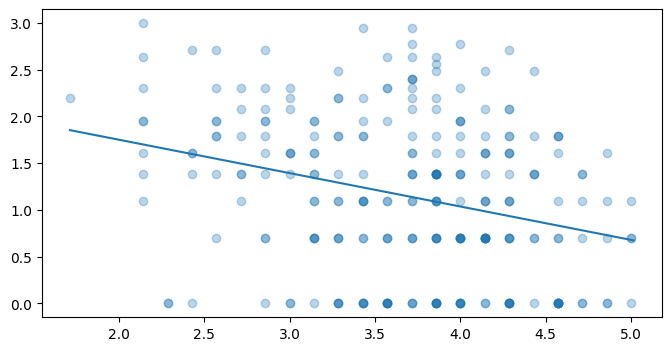

In [1278]:
scatter_polyfit_plot(
    anx_data.SFPQ_W,
    anx_data.DASS_A_log
)


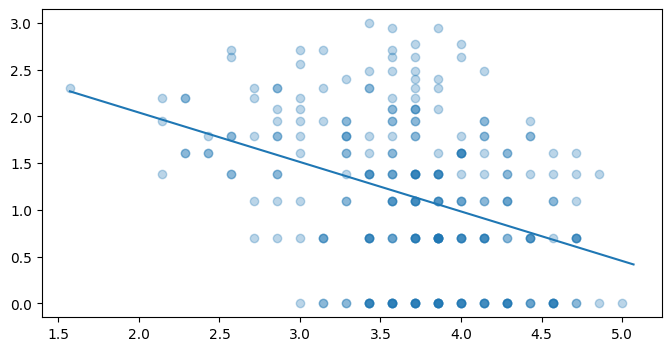

In [1279]:
scatter_polyfit_plot(
    anx_data.SFPQ_L,
    anx_data.DASS_A_log
)


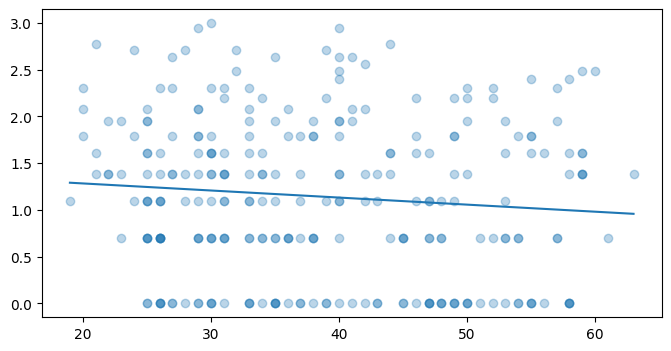

In [1280]:
# Get indices of missing data. Filter to non-missing by inverting via ~
missings = anx_data.age.isna()

scatter_polyfit_plot(
   anx_data.age[~missings],
   anx_data.DASS_A_log[~missings]
)

As far as I can tell, the relationships don't actually map better linearly. The main issue is the large amount of 0's in DASS_A results

# Set division and preprocessing data

In [1281]:
dummied_data = pd.get_dummies(anx_data, prefix=["gender", "work", "edu"])

dummied_data.head()

,age,CFQ_total,DASS_A,SFPQ_W,SFPQ_L,DASS_A_log,gender_F,gender_M,work_Employed on fixed-term contract,work_Employed on open ended contract,edu_Bachelor's Degree,edu_Elementary school,edu_High school,edu_Master's Degree,edu_Specialization or Doctor's Degree
0,26.0,36.0,4.0,2.857143,3.571429,1.609438,True,False,False,True,False,False,False,True,False
1,25.0,27.0,6.0,2.571429,3.000000,1.945910,True,False,True,False,False,False,False,True,False
2,54.0,44.0,5.0,3.285714,3.285714,1.791759,True,False,False,True,False,False,False,True,False
3,24.0,31.0,5.0,3.428571,2.571429,1.791759,False,True,True,False,True,False,False,False,False
4,22.0,48.0,6.0,2.571429,3.571429,1.945910,False,True,True,False,True,False,False,False,False


In [1282]:
# Cleanup some names from long values
dummied_data.rename(columns = 
                    {
                        "work_Employed on fixed-term contract" : "work_fixed",
                        "work_Employed on open ended contract" : "work_open",
                        "edu_Bachelor's Degree" : "edu_bachelors",
                        "edu_Elementary school" : "edu_elementary",
                        "edu_High school" : "edu_highschool",
                        "edu_Master's Degree" : "edu_masters",
                        "edu_Specialization or Doctor's Degree" : "edu_doctors"
                    },
                    inplace=True)


In [1283]:
dummied_data.head()

,age,CFQ_total,DASS_A,SFPQ_W,SFPQ_L,DASS_A_log,gender_F,gender_M,work_fixed,work_open,edu_bachelors,edu_elementary,edu_highschool,edu_masters,edu_doctors
0,26.0,36.0,4.0,2.857143,3.571429,1.609438,True,False,False,True,False,False,False,True,False
1,25.0,27.0,6.0,2.571429,3.000000,1.945910,True,False,True,False,False,False,False,True,False
2,54.0,44.0,5.0,3.285714,3.285714,1.791759,True,False,False,True,False,False,False,True,False
3,24.0,31.0,5.0,3.428571,2.571429,1.791759,False,True,True,False,True,False,False,False,False
4,22.0,48.0,6.0,2.571429,3.571429,1.945910,False,True,True,False,True,False,False,False,False


In [1284]:
train_set, other = train_test_split(dummied_data, train_size = 0.7, random_state=1234)

print(train_set.shape)
train_set.head()

(191, 15)


,age,CFQ_total,DASS_A,SFPQ_W,SFPQ_L,DASS_A_log,gender_F,gender_M,work_fixed,work_open,edu_bachelors,edu_elementary,edu_highschool,edu_masters,edu_doctors
238,44.0,50.0,15.0,3.714286,4.000000,2.772589,True,False,False,True,False,False,False,True,False
189,36.0,29.0,0.0,3.857143,4.857143,0.000000,True,False,False,True,False,False,False,False,True
59,38.0,49.0,1.0,4.000000,4.285714,0.693147,True,False,False,True,True,False,False,False,False
99,40.0,53.0,10.0,3.714286,3.285714,2.397895,True,False,False,True,False,False,True,False,False
108,56.0,39.0,0.0,4.142857,3.428571,0.000000,False,True,False,True,True,False,False,False,False


In [1285]:
cv_set, test_set = train_test_split(other, train_size = 0.5, random_state=1234)
cv_set.shape

(41, 15)

In [1286]:
predictor_columns = ["CFQ_total", "SFPQ_W", "SFPQ_L"]
train_main_pred = train_set.loc[:, predictor_columns]
train_main_pred

,CFQ_total,SFPQ_W,SFPQ_L
238,50.0,3.714286,4.000000
189,29.0,3.857143,4.857143
59,49.0,4.000000,4.285714
99,53.0,3.714286,3.285714
108,39.0,4.142857,3.428571
...,...,...,...
143,30.0,4.285714,4.142857
152,62.0,2.142857,3.428571
204,34.0,4.285714,4.000000
53,59.0,3.285714,3.714286


In [1287]:
# Another set, adding demographics
predictor_columns_demog = predictor_columns + \
["gender_F", "gender_M", "age", "work_fixed", "work_open", "edu_elementary", "edu_highschool", "edu_bachelors", "edu_masters", "edu_doctors"]
train_demog = train_set.loc[:, predictor_columns_demog]
train_demog

test_demog = test_set.loc[:, predictor_columns_demog]

# Defining models
## Linear regression

In [1288]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer

linear_reg = LinearRegression()

# Deal with missing values - impute median (of training set)
imputer = SimpleImputer(missing_values=np.nan, strategy = "median")
imputer.fit(train_demog)

# Transforming with impute return a np array, we want to retain dataframes

def impute_df(input_df, impute_object):
    # Impute missing values and immediately transform nparray to dataframe
    imputed_df = pd.DataFrame(impute_object.transform(input_df))
    # Fill in indexes and column names
    imputed_df.columns = input_df.columns
    impute_df.index = input_df.index
    return imputed_df

In [1289]:
train_demog = impute_df(train_demog, imputer)
test_demog = impute_df(test_demog, imputer)

In [1290]:
linear_reg.fit(train_demog, train_set["DASS_A"])

LinearRegression()

In [1291]:
def report_metrics(actual_values, predictions, set_name = ""):
    mae = mean_absolute_error(actual_values, predictions)
    rsq = r2_score(actual_values, predictions)
    print(f"{set_name} set MAE: {mae:.2f}\n \
        R^2: {rsq:.2f}")

In [1292]:
train_predictions = linear_reg.predict(train_demog)

report_metrics(train_set["DASS_A"], train_predictions, "Training")

test_predictions = linear_reg.predict(test_demog)

report_metrics(test_set["DASS_A"], test_predictions, "Test")


Training set MAE: 2.32
         R^2: 0.31
Test set MAE: 2.76
         R^2: 0.11


## Linear regression - on log anx

In [1293]:
linear_reg_log = LinearRegression()

linear_reg_log.fit(train_demog, train_set["DASS_A_log"])

LinearRegression()

In [1294]:
def get_full_anx(log_anx):
    transformed = np.exp(log_anx) - 1
    return(transformed)

In [1295]:
# The predictions should be returned to non-logarithmic form for accuracy metrics

train_predictions = linear_reg_log.predict(train_demog)

report_metrics(train_set["DASS_A"],
            get_full_anx(train_predictions), 
            "Training")

test_predictions = linear_reg_log.predict(test_demog)

report_metrics(test_set["DASS_A"],
                get_full_anx(test_predictions), 
                "Test")


Training set MAE: 2.25
         R^2: 0.23
Test set MAE: 2.83
         R^2: -0.03


## Random forest model

In [1296]:
from sklearn.ensemble import RandomForestRegressor

# Default parameters for now
rf_model = RandomForestRegressor()

rf_model.fit(train_demog, train_set["DASS_A"])

RandomForestRegressor()

In [1297]:
train_predictions = rf_model.predict(train_demog)

report_metrics(train_set["DASS_A"], train_predictions, "Training")

test_predictions = rf_model.predict(test_demog)

report_metrics(test_set["DASS_A"], test_predictions, "Test")


Training set MAE: 1.01
         R^2: 0.87
Test set MAE: 2.97
         R^2: 0.02


In [1298]:
rf_model_log = RandomForestRegressor()

rf_model_log.fit(train_demog, train_set["DASS_A_log"])

RandomForestRegressor()

In [1299]:
train_predictions = rf_model_log.predict(train_demog)

report_metrics(train_set["DASS_A"],
            get_full_anx(train_predictions), 
            "Training")

test_predictions = rf_model_log.predict(test_demog)

report_metrics(test_set["DASS_A"],
            get_full_anx(test_predictions), 
            "Test")


Training set MAE: 1.08
         R^2: 0.77
Test set MAE: 2.95
         R^2: -0.10


Very bad generalisation, log(target) doesn't seem to do much.
Trying to remove unhelpful features to prevent overfit.

In [1300]:
# Find the dummy columns for work status and gender
work_status_cols = [column for column in train_demog.columns if column.startswith("work")]
print(work_status_cols)
gender_cols = [column for column in train_demog.columns if column.startswith("gender")]
print(gender_cols)

['work_fixed', 'work_open']
['gender_F', 'gender_M']


In [1301]:
impactful_features = ["SFPQ_W", "SFPQ_L", "CFQ_total"] + work_status_cols + gender_cols
# Education level - mostly the same DASS values, the differences are groups with very few examples
impactful_features

['SFPQ_W',
 'SFPQ_L',
 'CFQ_total',
 'work_fixed',
 'work_open',
 'gender_F',
 'gender_M']

In [1302]:
# Feature-selected sets
train_fs = train_set.loc[:, impactful_features]

test_fs = test_set.loc[:, impactful_features]

In [1303]:
imputer = SimpleImputer(missing_values=np.nan, strategy = "median")
imputer.fit(train_fs)

train_fs = impute_df(train_fs, imputer)
test_fs = impute_df(test_fs, imputer)

In [1304]:
rf_model_fs = RandomForestRegressor(max_features="sqrt",  min_samples_split=0.03)

rf_model_fs.fit(train_fs, train_set["DASS_A"])

RandomForestRegressor(max_features='sqrt', min_samples_split=0.03)

In [1305]:
train_predictions = rf_model_fs.predict(train_fs)

report_metrics(train_set["DASS_A"],
            train_predictions, 
            "Training")

test_predictions = rf_model_fs.predict(test_fs)

report_metrics(test_set["DASS_A"],
            test_predictions, 
            "Test")

Training set MAE: 1.63
         R^2: 0.65
Test set MAE: 2.90
         R^2: 0.09


This still performs on par with feature-rich model. Not better, not worse.
Try adding 2nd order polynomial for CFQ scores.

In [1306]:
cfq_p2 =  np.power(train_set.CFQ_total, 2)
cfq_p2

238    2500.0
189     841.0
59     2401.0
99     2809.0
108    1521.0
        ...  
143     900.0
152    3844.0
204    1156.0
53     3481.0
211    1444.0
Name: CFQ_total, Length: 191, dtype: float64

In [1307]:
train_set["cfq_p2"] =  np.power(train_set.CFQ_total, 2)
test_set["cfq_p2"] =  np.power(test_set.CFQ_total, 2)

In [1308]:
impactful_features = ["SFPQ_W", "SFPQ_L", "CFQ_total", "cfq_p2"] + work_status_cols + gender_cols
train_fs = train_set.loc[:, impactful_features]

test_fs = test_set.loc[:, impactful_features]

In [1309]:
imputer = SimpleImputer(missing_values=np.nan, strategy = "median")
imputer.fit(train_fs)

train_fs = impute_df(train_fs, imputer)
test_fs = impute_df(test_fs, imputer)

rf_model_fs = RandomForestRegressor(max_features="sqrt",  min_samples_split=0.03)

rf_model_fs.fit(train_fs, train_set["DASS_A"])

RandomForestRegressor(max_features='sqrt', min_samples_split=0.03)

In [1310]:
train_predictions = rf_model_fs.predict(train_fs)

report_metrics(train_set["DASS_A"],
            train_predictions, 
            "Training")

test_predictions = rf_model_fs.predict(test_fs)

report_metrics(test_set["DASS_A"],
            test_predictions, 
            "Test")

Training set MAE: 1.60
         R^2: 0.64
Test set MAE: 2.88
         R^2: 0.05


2nd order didn't really help.

New task - setup a pipeline for imputing missing values, and polynomial for CFQ. Also, add standardization.

## Using a pipeline

In [1311]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

pipe = Pipeline(steps = [
    ("imputer_median", SimpleImputer(missing_values=np.nan, strategy = "median")),
    ("scaler", StandardScaler()),
    ("preprocessor", PolynomialFeatures(degree = 1)),
    ("rf_regressor", RandomForestRegressor(max_features="sqrt",  min_samples_split=0.03,  random_state=1111))
])


In [1312]:
# Get feature-selected train and test set without imputations
impactful_features = ["SFPQ_W", "SFPQ_L", "CFQ_total", "cfq_p2"] + work_status_cols + gender_cols
train_fs = train_set.loc[:, impactful_features]

test_fs = test_set.loc[:, impactful_features]

In [1313]:
pipe.fit(train_fs, train_set["DASS_A"])

train_predictions = pipe.predict(train_fs)

report_metrics(train_set["DASS_A"],
            train_predictions, 
            "Training")

# Pipe predict is enough to apply all necessary steps to new input data
test_predictions = pipe.predict(test_fs)

report_metrics(test_set["DASS_A"],
            test_predictions, 
            "Test")

Training set MAE: 1.56
         R^2: 0.67
Test set MAE: 2.91
         R^2: 0.05


Using steps only on certain variables: using a ColumnTransformer() from sklearn.compose, then including that as a step in the pipeline
https://stackoverflow.com/questions/72931145/how-to-apply-polynomialfeatures-only-to-certain-not-all-independent-variables

New task - create a similar pipeline, but Polynomial features only for CFQ, AND impute mod for categorical variables, median for numeric.
Check whether unecessary columns already present in data --- one hot encoding should be done as a pipeline step

In [1314]:
# Repeat data split from original df - don't preprocess with dummies etc

train_set, other = train_test_split(anx_data, train_size = 0.7, random_state=1234)
cv_set, test_set = train_test_split(other, train_size = 0.5, random_state=1234)

print(train_set.columns)
predictor_columns = ["CFQ_total", "SFPQ_W", "SFPQ_L", "gender", "age", "work_status", "level_education"]

Index(['age', 'gender', 'work_status', 'level_education', 'CFQ_total',
       'DASS_A', 'SFPQ_W', 'SFPQ_L', 'DASS_A_log'],
      dtype='object')


In [1315]:
categorical_preds = ['gender', 'work_status', 'level_education']
# all other predictors are numerical
numerical_preds = np.setdiff1d(predictor_columns, categorical_preds).tolist()

print(categorical_preds)
print(numerical_preds)

['gender', 'work_status', 'level_education']
['CFQ_total', 'SFPQ_L', 'SFPQ_W', 'age']


In [1316]:
# CFQ will be treated separately, so we need a list of numerics that AREN'T CFQ
numerics_no_cfq = np.setdiff1d(numerical_preds, "CFQ_total").tolist()
numerics_no_cfq

['SFPQ_L', 'SFPQ_W', 'age']

In [1317]:
# Specific pipelines for categoricals and numeric
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_preprocessor = Pipeline(
    steps = [
        ("impute_dominant", SimpleImputer(strategy="most_frequent")),
        ("make_dummies", OneHotEncoder(sparse_output=False))
    ]
)

In [1318]:
numerical_preprocessor = Pipeline(
    steps = [
        ("impute_median", SimpleImputer(strategy="median")),
        ("standardise", StandardScaler())
    ]
)

In [1319]:
CFQ_preprocessor = Pipeline(
    steps = [
        ("impute_median", SimpleImputer(strategy="median")),
        # Polynomial 2nd degree - only for CFQ
        ("CFQ_poly", PolynomialFeatures(degree = 2, include_bias = True)),
        ("standardise", StandardScaler())
    ]
)

In [1320]:
# These pipelines go to a ColumnTransformer to indicate what variables they apply to
preprocessing_ct = ColumnTransformer(
    [
        ("categoricals", categorical_preprocessor, categorical_preds),
        ("numerics", numerical_preprocessor, numerics_no_cfq),
        # Single column - MUST be a list, still!
        ("cfq_pre", CFQ_preprocessor, ["CFQ_total"])
    ],
    remainder = "passthrough"
)

In [1321]:
# Main pipe that applies preprocessing and then fits actual model

pipe = Pipeline(steps = [
    ("preprocessor", preprocessing_ct),
    ("rf_regressor", RandomForestRegressor(max_features="sqrt",  min_samples_split=0.03,  random_state=1111))
])


In [1322]:
pipe.fit(train_set.loc[:, predictor_columns], train_set["DASS_A"])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categoricals',
                                                  Pipeline(steps=[('impute_dominant',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('make_dummies',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['gender', 'work_status',
                                                   'level_education']),
                                                 ('numerics',
                                                  Pipeline(steps=[('impute_median',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardise',
                                                                   StandardScaler())]),
                                                  ['SFPQ_L', 'SFPQ_W', 'age']),
                                                 ('cfq_pre',
                                                  Pipeline(steps=[('impute_median',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('CFQ_poly',
                                                                   PolynomialFeatures()),
                                                                  ('standardise',
                                                                   StandardScaler())]),
                                                  ['CFQ_total'])])),
                ('rf_regressor',
                 RandomForestRegressor(max_features='sqrt',
                                       min_samples_split=0.03,
                                       random_state=1111))])

In [1323]:
train_predictions = pipe.predict(train_set)

report_metrics(train_set["DASS_A"],
            train_predictions, 
            "Training")

# Pipe predict is enough to apply all necessary steps to new input data
test_predictions = pipe.predict(test_set)

report_metrics(test_set["DASS_A"],
            test_predictions, 
            "Test")

Training set MAE: 1.56
         R^2: 0.68
Test set MAE: 2.90
         R^2: 0.08


In [1324]:
# Show processed data
processed_input = preprocessing_ct.transform(train_set)[:1,]

# Why the [-1]? It's even mentioned in the error message
columnames = pipe[:-1].get_feature_names_out()

# Trim excessively long names
columnames = [(colname[:20] + "..."*(len(colname) > 20)) for colname in columnames]

processed_input = pd.DataFrame(processed_input, columns = columnames)
processed_input


,categoricals__gender...,categoricals__gender...,categoricals__work_s...,categoricals__work_s...,categoricals__level_...,categoricals__level_...,categoricals__level_...,categoricals__level_...,categoricals__level_...,numerics__SFPQ_L,numerics__SFPQ_W,numerics__age,cfq_pre__1,cfq_pre__CFQ_total,cfq_pre__CFQ_total^2
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.55995,0.084071,0.62622,0.0,0.90963,0.779345


In [1325]:
print(processed_input.shape)

(1, 15)


# New model
Predict presence of anxiety as categorical variable  
If it does well - try a regression on ANX PRESENT subset

In [1326]:
anx_freq = pd.DataFrame(
    {"Frequency" : anx_data.groupby("DASS_A", as_index = True)["DASS_A"].count()}
)
# Original values as a column
anx_freq.reset_index()

# Cumulative sum and proportion
anx_freq["Cumulative_frequency"] = anx_freq["Frequency"].cumsum()

total_freq = sum(anx_freq["Frequency"])
anx_freq["Cumulative_proportion"] = anx_freq["Cumulative_frequency"] / total_freq


anx_freq

,Frequency,Cumulative_frequency,Cumulative_proportion
DASS_A,,,
0.0,63,63,0.230769
1.0,51,114,0.417582
2.0,29,143,0.523810
3.0,32,175,0.641026
4.0,21,196,0.717949
5.0,19,215,0.787546
6.0,13,228,0.835165
7.0,8,236,0.864469
8.0,7,243,0.890110


On this frequency table, decide upon a cutoff point that will distinguish anxiety as being present and not.
For now, we'll choose 5 points or more as being indicative of anxiety. 72% of subjects have less reported anxiety than the cutoff.

In [1327]:
cutoff_value = 5

anx_data["Anxiety_present"] = anx_data["DASS_A"] >= 5

print(anx_data.head())

print("Distribution of target values")
anx_data.groupby("Anxiety_present", as_index = True)["Anxiety_present"].count()

    age gender                      work_status    level_education  CFQ_total  \
0  26.0      F  Employed on open ended contract    Master's Degree       36.0   
1  25.0      F  Employed on fixed-term contract    Master's Degree       27.0   
2  54.0      F  Employed on open ended contract    Master's Degree       44.0   
3  24.0      M  Employed on fixed-term contract  Bachelor's Degree       31.0   
4  22.0      M  Employed on fixed-term contract  Bachelor's Degree       48.0   

   DASS_A    SFPQ_W    SFPQ_L  DASS_A_log  Anxiety_present  
0     4.0  2.857143  3.571429    1.609438            False  
1     6.0  2.571429  3.000000    1.945910             True  
2     5.0  3.285714  3.285714    1.791759             True  
3     5.0  3.428571  2.571429    1.791759             True  
4     6.0  2.571429  3.571429    1.945910             True  
Distribution of target values


Anxiety_present
False    196
True      77
Name: Anxiety_present, dtype: int64

Organise train-test split with this variable, reinitialise preprocessors, run new model

In [1328]:
# anx_data now includes Anxiety present

train_set, other = train_test_split(anx_data, train_size = 0.7, random_state=1234)
cv_set, test_set = train_test_split(other, train_size = 0.5, random_state=1234)

print(train_set.columns)
predictor_columns = ["CFQ_total", "SFPQ_W", "SFPQ_L", "gender", "age", "work_status", "level_education"]

Index(['age', 'gender', 'work_status', 'level_education', 'CFQ_total',
       'DASS_A', 'SFPQ_W', 'SFPQ_L', 'DASS_A_log', 'Anxiety_present'],
      dtype='object')


In [1329]:
categorical_preds = ['gender', 'work_status', 'level_education']
# all other predictors are numerical
numerical_preds = np.setdiff1d(predictor_columns, categorical_preds).tolist()

print(categorical_preds)
print(numerical_preds)

['gender', 'work_status', 'level_education']
['CFQ_total', 'SFPQ_L', 'SFPQ_W', 'age']


In [1330]:
# CFQ will be treated separately, so we need a list of numerics that AREN'T CFQ
numerics_no_cfq = np.setdiff1d(numerical_preds, "CFQ_total").tolist()
numerics_no_cfq

['SFPQ_L', 'SFPQ_W', 'age']

In [1331]:
categorical_preprocessor = Pipeline(
    steps = [
        ("impute_dominant", SimpleImputer(strategy="most_frequent")),
        ("make_dummies", OneHotEncoder(sparse_output=False))
    ]
)

In [1332]:
numerical_preprocessor = Pipeline(
    steps = [
        ("impute_median", SimpleImputer(strategy="median")),
        ("standardise", StandardScaler())
    ]
)

In [1333]:
CFQ_preprocessor = Pipeline(
    steps = [
        ("impute_median", SimpleImputer(strategy="median")),
        # Polynomial 2nd degree - only for CFQ
        ("CFQ_poly", PolynomialFeatures(degree = 2, include_bias = False)),
        ("standardise", StandardScaler())
    ]
)

In [1334]:
# These pipelines go to a ColumnTransformer to indicate what variables they apply to
preprocessing_ct = ColumnTransformer(
    [
        ("categoricals", categorical_preprocessor, categorical_preds),
        ("numerics", numerical_preprocessor, numerics_no_cfq),
        # Single column - MUST be a list, still!
        ("cfq_pre", CFQ_preprocessor, ["CFQ_total"])
    ],
    remainder = "passthrough"
)

In [1335]:
# Main pipe that applies preprocessing and then fits actual model

from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline(steps = [
    ("preprocessor", preprocessing_ct),
    ("rf_regressor", RandomForestClassifier(max_features="sqrt", random_state=1111))
])


In [1336]:
pipe.fit(train_set.loc[:, predictor_columns], train_set["Anxiety_present"])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categoricals',
                                                  Pipeline(steps=[('impute_dominant',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('make_dummies',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['gender', 'work_status',
                                                   'level_education']),
                                                 ('numerics',
                                                  Pipeline(steps=[('impute_median',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardise',
                                                                   StandardScaler())]),
                                                  ['SFPQ_L', 'SFPQ_W', 'age']),
                                                 ('cfq_pre',
                                                  Pipeline(steps=[('impute_median',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('CFQ_poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('standardise',
                                                                   StandardScaler())]),
                                                  ['CFQ_total'])])),
                ('rf_regressor', RandomForestClassifier(random_state=1111))])

In [1337]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score

def report_classifier_metrics(actual_values, predictions, set_name = ""):
    acc = accuracy_score(actual_values, predictions)
    bal_acc = balanced_accuracy_score(actual_values, predictions)
    f1_sc = f1_score(actual_values, predictions)

    print(f"{set_name} set Accuracy: {acc:.2f}\n \
            Balanced Accuracy: {bal_acc:.2f}\n  \
            F1 Score: {f1_sc:.2f})\n")

In [1338]:
# Same evaluation procedure, new metrics
train_predictions = pipe.predict(train_set)

report_classifier_metrics(train_set["Anxiety_present"],
            train_predictions, 
            "Training")

test_predictions = pipe.predict(test_set)

report_classifier_metrics(test_set["Anxiety_present"],
            test_predictions, 
            "Test")

Training set Accuracy: 1.00
             Balanced Accuracy: 1.00
              F1 Score: 1.00)

Test set Accuracy: 0.78
             Balanced Accuracy: 0.62
              F1 Score: 0.40)

